In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
sns.set_style("whitegrid")
import altair as alt
# alt.renderers.enable("notebook")

# Code for hiding seaborn warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [6]:
df_path = "/content/drive/MyDrive/SDGP code/Classification/DataAnalysis"
df_path2 = df_path + '/csv-dataframe.csv'
df = pd.read_csv(df_path2)
# del df['Unnamed:']
df.head()

,Unnamed: 0,category,legName,pieceName,content
0,0,family,Rectification of a Muslim Marriage Register of...,0-Intro.txt,Rectification Of A Muslim Marriage Register Of...
1,1,family,Rectification of a Muslim Marriage Register of...,1-Short title.txt,This Act may be cited as the Rectification of ...
2,2,family,Rectification of a Muslim Marriage Register of...,2-Rectification of marriage register kept by a...,(1) Where any marriages have been registered b...
3,3,family,Kandyan Marriage and Divorce Act,0-Intro.txt,MARRIAGE AND DIVORCE (KANDYAN)\nAN ACT TO AMEN...
4,4,family,Kandyan Marriage and Divorce Act,1-Short title.txt,This Act may be cited as the Kandyan Marriage ...


In [8]:

bars = alt.Chart(df).mark_bar(size=50).encode(
    x=alt.X("category"),
    y=alt.Y("count():Q", axis=alt.Axis(title='Number of articles')),
    tooltip=[alt.Tooltip('count()', title='Number of articles'), 'category'],
    color='category'

)

text = bars.mark_text(
    align='center',
    baseline='bottom',
).encode(
    text='count()'
)

(bars + text).interactive().properties(
    height=300, 
    width=700,
    title = "Number of articles in each category",
)

alt.LayerChart(...)

In [11]:
df['id'] = 1
df2 = pd.DataFrame(df.groupby('category').count()['id']).reset_index()

bars = alt.Chart(df2).mark_bar(size=50).encode(
    x=alt.X('category'),
    y=alt.Y('PercentOfTotal:Q', axis=alt.Axis(format='.0%', title='% of Articles')),
    color='category'
).transform_window(
    TotalArticles='sum(id)',
    frame=[None, None]
).transform_calculate(
    PercentOfTotal="datum.id / datum.TotalArticles"
)

text = bars.mark_text(
    align='center',
    baseline='bottom',
    #dx=5  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text=alt.Text('PercentOfTotal:Q', format='.1%')
)

(bars + text).interactive().properties(
    height=300, 
    width=700,
    title = "% of articles in each category",
)

alt.LayerChart(...)

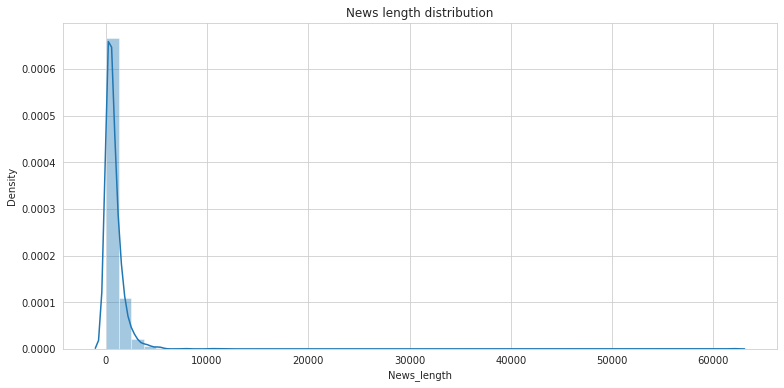

In [14]:
df['piece_length'] = df['content'].str.len()

plt.figure(figsize=(12.8,6))
sns.distplot(df['News_length']).set_title('News length distribution');

In [15]:
df['piece_length'].describe()

count     1950.000000
mean       809.274872
std       1605.786427
min         34.000000
25%        265.250000
50%        518.000000
75%       1018.000000
max      62027.000000
Name: piece_length, dtype: float64

In [16]:
quantile_95 = df['piece_length'].quantile(0.95)
df_95 = df[df['piece_length'] < quantile_95]

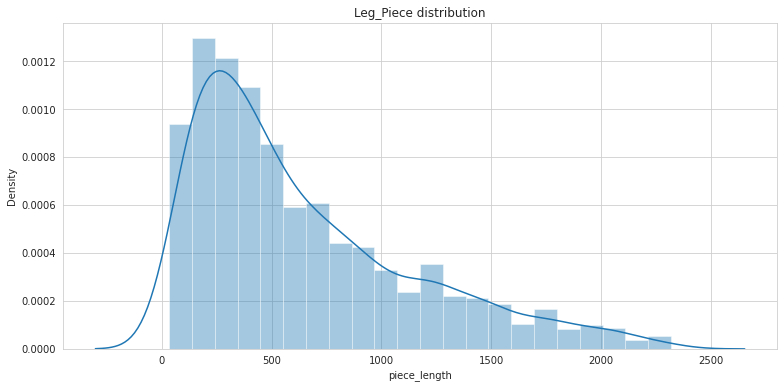

In [17]:
plt.figure(figsize=(12.8,6))
sns.distplot(df_95['piece_length']).set_title('Leg_Piece distribution');

In [19]:
df_more10k = df[df['piece_length'] > 10000]
len(df_more10k)

2

In [20]:
df_more10k['content'].iloc[0]

'The following new sections are hereby inserted immediately after section 57, and shall have effect respectively as section 57A, section 57B, section 57c, section 57o, section 57E and section 57F, of the principal enactment:\n\n57A.\n(1) The succeeding provisions of this section shall not apply to the pension payable in respect of any person who, after leaving the public service, has continued to contribute under section 13 or section 15 of this Ordinance.\n\n(2) Where a person who is or was a contributor dies on or after the relevant date, the pension payable under this Ordinance in respect of such person shall, anything in this Ordinance to the contrary notwithstanding, be determined in accordance with the following provisions:\n(a) Where such person dies while in the public service or having retired from the public service before reaching the age of compulsory retirement or after having been retired from the public service on any ground other than on the grounds set out in the Estab

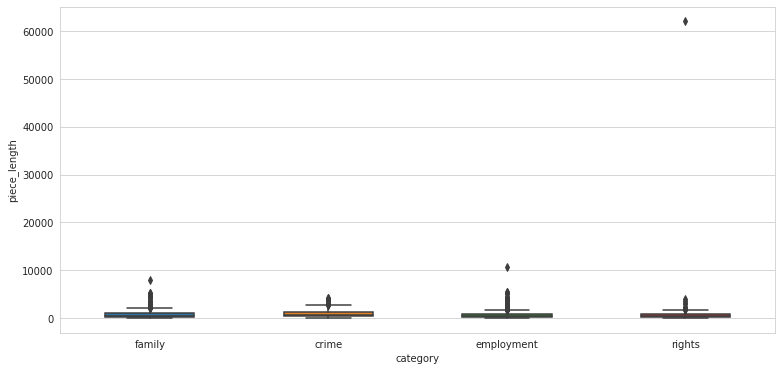

In [27]:
plt.figure(figsize=(12.8,6))
sns.boxplot(data=df, x='category', y='piece_length', width=.5);

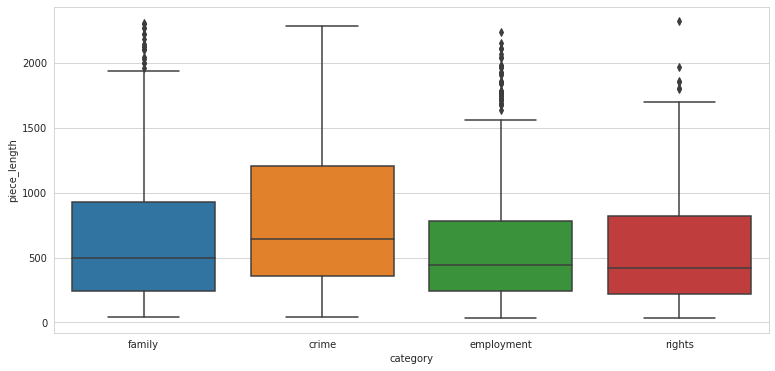

In [26]:
plt.figure(figsize=(12.8,6))
sns.boxplot(data=df_95, x='category', y='piece_length');